In [1]:
%matplotlib inline

import numpy as np
from numpy import array 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from collections import Counter
from collections import defaultdict
from sklearn import metrics

from sklearn import tree
import scikitplot as skplt

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

import scikitplot as skplt
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from scipy.special import expit
from sklearn.svm import LinearSVC

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint
from sklearn.neural_network import MLPClassifier

#history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val)).history

## Datasets con solo 2 classi

In [2]:
df = pd.read_csv("df_RFE_6Class_LOF.csv")
df = df.drop(columns = ["Unnamed: 0"])

In [3]:
df_test = pd.read_csv("df_RFE_test.csv")
df_test = df_test.drop(columns = ["Unnamed: 0"])
df_test

,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,1",...,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,"fBodyAccJerk-bandsEnergy()-1,16",fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)",label
0,-0.168084,0.076989,-0.709003,-0.282719,0.906083,0.152895,0.944461,-0.262160,-0.864621,-0.795468,...,-0.940137,-0.958325,-0.998040,-1.000000,0.184035,-0.726707,-0.953984,-0.907308,0.276801,5
1,-0.302437,-0.104983,0.399177,-0.289215,0.856176,0.152895,0.944461,-0.262160,-0.858163,-0.745687,...,-0.974357,-0.987087,-0.999641,-1.000000,0.018109,-0.960680,-0.998476,-0.938212,0.281343,5
2,-0.617916,0.305653,0.279786,-0.287513,0.856269,0.139454,0.948704,-0.261661,-0.859947,-0.231640,...,-0.983773,-0.975581,-0.999954,-1.000000,-0.479145,-0.977176,-0.999570,-0.983273,0.280083,5
3,-0.749578,-0.063792,0.544916,-0.293396,0.856269,0.136124,0.947309,-0.272916,-0.853713,-0.233036,...,-0.987887,-0.979580,-0.999949,-1.000000,-0.496954,-0.976796,-0.999504,-0.985843,0.284114,5
4,-0.590576,0.235151,0.457718,-0.302961,0.853942,0.133541,0.946221,-0.279190,-0.843378,-0.493331,...,-0.972039,-0.975105,-0.999955,-1.000000,-0.427502,-0.975706,-0.999500,-0.990572,0.290722,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.128951,-0.258908,-0.022682,-0.276718,0.823272,0.226640,0.903413,-0.272203,-0.870515,-0.676626,...,-0.397114,-0.659382,-0.792017,-1.000000,-0.038775,-0.202661,-0.702110,-0.618829,0.274627,2
2943,0.311991,-0.249325,0.031417,-0.274976,0.823272,0.220590,0.903793,-0.268172,-0.872342,-0.548616,...,-0.363990,-0.604243,-0.807522,-1.000000,-0.258493,-0.196060,-0.674032,-0.592507,0.273578,2
2944,0.342902,-0.351080,0.118835,-0.276165,0.822107,0.220590,0.903793,-0.268172,-0.871197,-0.566802,...,-0.292071,-0.533585,-0.830224,-1.000000,-0.083427,-0.208208,-0.715711,-0.617948,0.274479,2
2945,0.194918,-0.190791,0.122642,-0.262356,0.823679,0.231517,0.909007,-0.244744,-0.884788,-0.641468,...,-0.415850,-0.661178,-0.838522,-0.933333,-0.242417,-0.259605,-0.745225,-0.654960,0.264782,2


In [4]:
attributes = [col for col in df_test.columns if col != 'label']

X_train = df[attributes].values
y_train = np.array(df['label'])

X_test = df_test[attributes].values
y_test = np.array(df_test['label'])
X_train.shape,y_train.shape

((7037, 29), (7037,))

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [213]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

modelp = Perceptron(random_state=0)

search = GridSearchCV(modelp, {'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
                               'max_iter': [5, 10, 15, 20, 50,100],
                               'tol': [0.001, 0.01, 0.1],
                               'eta0': [0.001, 0.01, 0.1]},
                      cv=cv, scoring='accuracy', n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Mean Accuracy: 0.940
Config: {'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 50, 'tol': 0.001}
>0.930 with: {'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 5, 'tol': 0.001}
>0.930 with: {'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 5, 'tol': 0.01}
>0.930 with: {'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 5, 'tol': 0.1}
>0.933 with: {'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 10, 'tol': 0.001}
>0.933 with: {'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 10, 'tol': 0.01}
>0.933 with: {'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 10, 'tol': 0.1}
>0.933 with: {'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 15, 'tol': 0.001}
>0.933 with: {'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 15, 'tol': 0.01}
>0.933 with: {'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 15, 'tol': 0.1}
>0.933 with: {'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 20, 'tol': 0.001}
>0.933 with: {'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 20, 'tol': 0.01}
>0.933 with: {'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 20, 'tol': 0.1}
>0.933 with: 

In [214]:
results.best_params_

{'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 50, 'tol': 0.001}

In [215]:
from sklearn.linear_model import Perceptron

In [216]:
ppn = Perceptron(random_state=0,**results.best_params_)

In [217]:
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=50)

In [225]:
y_pred = ppn.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))

Accuracy 0.9005768578215134
F1-score 0.898875629418754
              precision    recall  f1-score   support

           1       0.84      0.99      0.91       496
           2       0.90      0.81      0.85       471
           3       0.97      0.86      0.91       420
           4       0.87      0.86      0.86       491
           5       0.87      0.87      0.87       532
           6       0.99      1.00      0.99       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



# MLP

In [6]:
clf1 = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='constant', 
                    activation='tanh', momentum=0.9, random_state=0)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred1))
print('F1-score %s' % f1_score(y_test, y_pred1, average=None))

Accuracy 0.9022734984730234
F1-score [0.91081594 0.84324324 0.91885144 0.85185185 0.88135593 0.9972093 ]


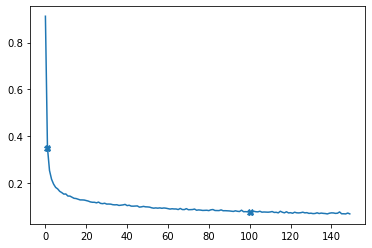

In [12]:
plt.plot(clf1.loss_curve_, marker ="X", markevery = [1,100])
plt.show()

In [261]:
clf2 = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='identity', momentum=0.9, random_state=0)

clf2.fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred2))
print('F1-score %s' % f1_score(y_test, y_pred2, average=None))
print(classification_report(y_test, y_pred2))

Accuracy 0.9134713267729895
F1-score [0.94368932 0.88936627 0.93234932 0.84590861 0.87272727 0.99165894]
              precision    recall  f1-score   support

           1       0.91      0.98      0.94       496
           2       0.90      0.88      0.89       471
           3       0.96      0.90      0.93       420
           4       0.88      0.81      0.85       491
           5       0.85      0.90      0.87       532
           6       0.99      1.00      0.99       537

    accuracy                           0.91      2947
   macro avg       0.92      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



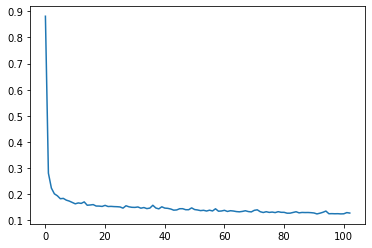

In [262]:
plt.plot(clf2.loss_curve_)
plt.show()

In [265]:
clf3 = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='logistic', momentum=0.9, random_state=0)

clf3.fit(X_train, y_train)

y_pred3 = clf3.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred3))
print('F1-score %s' % f1_score(y_test, y_pred3, average=None))
print(classification_report(y_test, y_pred3))

Accuracy 0.8934509670851714
F1-score [0.94695481 0.84254432 0.90012034 0.82247191 0.86510009 0.97421203]
              precision    recall  f1-score   support

           1       0.92      0.97      0.95       496
           2       0.83      0.86      0.84       471
           3       0.91      0.89      0.90       420
           4       0.92      0.75      0.82       491
           5       0.81      0.93      0.87       532
           6       1.00      0.95      0.97       537

    accuracy                           0.89      2947
   macro avg       0.90      0.89      0.89      2947
weighted avg       0.90      0.89      0.89      2947



C:\Users\daddu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


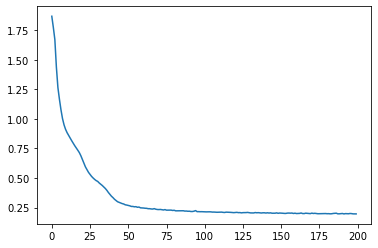

In [266]:
plt.plot(clf3.loss_curve_)
plt.show()

In [257]:
clf4 = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='relu', momentum=0.9, random_state=0)

clf4.fit(X_train, y_train)

y_pred4 = clf4.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred4))
print('F1-score %s' % f1_score(y_test, y_pred4, average=None))
print(classification_report(y_test, y_pred4))

Accuracy 0.8934509670851714
F1-score [0.92566898 0.8301119  0.90123457 0.84080717 0.88       0.9752381 ]
              precision    recall  f1-score   support

           1       0.91      0.94      0.93       496
           2       0.80      0.87      0.83       471
           3       0.94      0.87      0.90       420
           4       0.94      0.76      0.84       491
           5       0.82      0.95      0.88       532
           6       1.00      0.95      0.98       537

    accuracy                           0.89      2947
   macro avg       0.90      0.89      0.89      2947
weighted avg       0.90      0.89      0.89      2947



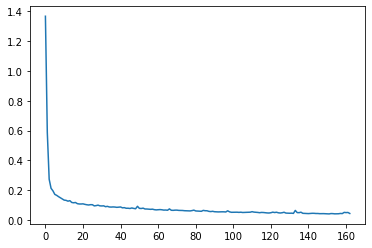

In [258]:
plt.plot(clf4.loss_curve_)
plt.show()

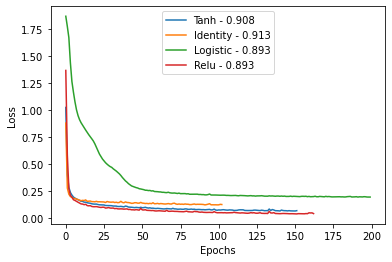

In [267]:

plt.plot(clf1.loss_curve_,label="Tanh - "+str(round(clf1.score(X_test, y_test),3)))
plt.plot(clf2.loss_curve_,label="Identity - "+str(round(clf2.score(X_test, y_test),3)))
plt.plot(clf3.loss_curve_,label="Logistic - "+str(round(clf3.score(X_test, y_test),3)))
plt.plot(clf4.loss_curve_,label="Relu - "+str(round(clf4.score(X_test, y_test),3)))


plt.legend(loc="upper center")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [50]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=10)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels

KeyboardInterrupt: 

In [69]:
print('Best parameters found:\n', clf.best_params_)

AttributeError: 'MLPClassifier' object has no attribute 'best_params_'

In [252]:
params = [{'activation':'identity',  'momentum': .9, 'learning_rate_init': 0.1},
          {'activation':'logistic',  'momentum': .9, 'learning_rate_init': 0.1},
          {'activation':'tanh','momentum': .9, 'learning_rate_init': 0.1},
          {'activation':'relu',  'momentum': .9, 'learning_rate_init': 0.1}]

labels = ["Identity - Adaptive", "Logistic - Adaptive",
          "Tanh - Adaptive", "Relu - Adaptive", "Relu - Constant","Relu - Inv. Scaling"]

In [253]:
import warnings
from sklearn.exceptions import ConvergenceWarning

Identity - Adaptive
training set score and loss: 0.890, 0.435928
Logistic - Adaptive
training set score and loss: 0.883, 0.308074
Tanh - Adaptive
training set score and loss: 0.876, 0.777241
Relu - Adaptive
training set score and loss: 0.889, 0.214242


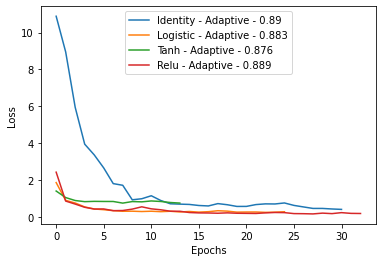

In [255]:
for label, param in zip(labels, params):
    print(label)
    clf = MLPClassifier(random_state=0, max_iter=150, hidden_layer_sizes=(128, 64, 32,), alpha=0.1,
                        **param, early_stopping=True)

    # some parameter combinations will not converge as can be seen on the
    # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        clf.fit(X_train, y_train)

    print("training set score and loss: %.3f, %f" % (clf.score(X_test, y_test), clf.loss_))
    plt.plot(clf.loss_curve_, label=label+" - "+str(round(clf.score(X_test, y_test),3)))
    plt.legend(loc="upper center")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
plt.show()

In [307]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
import numpy as np

def hyperparameter_tune(clf, parameters, iterations, X, y):
    randomSearch = RandomizedSearchCV(clf, param_distributions=parameters, n_jobs=-1, n_iter=iterations, cv=2) 
    randomSearch.fit(X,y)
    params = randomSearch.best_params_
    score = randomSearch.best_score_
    return params, score


parameters = {
    'activation': ['tanh', 'relu',"identity", "logistic"],
    'solver': ['sgd', 'adam',"lbfgs"],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'alpha': 10.0 ** -np.arange(1, 10), 
    'hidden_layer_sizes':np.arange(10, 15), 
    'random_state':[0,1,2,3,4,5,6,7,8,9]
}

clf = MLPClassifier(batch_size=50, verbose=True)

parameters_after_tuning, score_after_tuning = hyperparameter_tune(clf, parameters, 50, X_train,y_train);
print(score_after_tuning, parameters_after_tuning)

Iteration 1, loss = 1.31750561
Iteration 2, loss = 0.63606860
Iteration 3, loss = 0.38763643
Iteration 4, loss = 0.28674887
Iteration 5, loss = 0.23760419
Iteration 6, loss = 0.20810907
Iteration 7, loss = 0.19057870
Iteration 8, loss = 0.17597216
Iteration 9, loss = 0.16572816
Iteration 10, loss = 0.15840594
Iteration 11, loss = 0.15107747
Iteration 12, loss = 0.14561858
Iteration 13, loss = 0.14072410
Iteration 14, loss = 0.13720548
Iteration 15, loss = 0.13304006
Iteration 16, loss = 0.12939256
Iteration 17, loss = 0.12699932
Iteration 18, loss = 0.12307680
Iteration 19, loss = 0.12029843
Iteration 20, loss = 0.11872482
Iteration 21, loss = 0.11618950
Iteration 22, loss = 0.11352585
Iteration 23, loss = 0.11155896
Iteration 24, loss = 0.10965401
Iteration 25, loss = 0.10790594
Iteration 26, loss = 0.10607247
Iteration 27, loss = 0.10437498
Iteration 28, loss = 0.10349026
Iteration 29, loss = 0.10157144
Iteration 30, loss = 0.10162579
Iteration 31, loss = 0.09897499
Iteration 32, los

In [308]:
clf5 = MLPClassifier(**parameters_after_tuning)
clf5.fit(X_train, y_train)
y_pred5 = clf5.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred5))
print('F1-score %s' % f1_score(y_test, y_pred5, average=None))
print(classification_report(y_test, y_pred5))

Accuracy 0.8985408890397014
F1-score [0.90616114 0.83183857 0.9253012  0.84665227 0.87376902 0.99627561]
              precision    recall  f1-score   support

           1       0.86      0.96      0.91       496
           2       0.88      0.79      0.83       471
           3       0.94      0.91      0.93       420
           4       0.90      0.80      0.85       491
           5       0.83      0.92      0.87       532
           6       1.00      1.00      1.00       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



C:\Users\daddu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: x, y, and format string must not be None

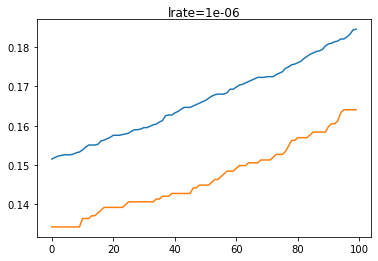

In [248]:
# study of learning rate on accuracy for blobs problem
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, lrate):
    # define model
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dense(7, activation="softmax"))
    # compile model
    opt = SGD(lr=lrate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0)
    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('lrate='+str(lrate), pad=-50)

# prepare dataset

# create learning curves for different learning rates
learning_rates = [1E-6] #, 1E-3, 1E-4, 1E-7
for i in range(len(learning_rates)):

    # fit model and plot learning curves for a learning rate
    plt.plot(fit_model(X_train, y_train, X_test, y_test, learning_rates[i]))


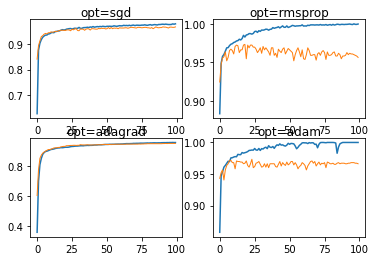

In [64]:
# study of learning rate on accuracy for blobs problem
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, optimizer):
    # define model
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dense(7, activation="softmax"))
    # compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0)
    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test', lw = 1)
    pyplot.title('opt='+optimizer, pad=-80)
    
# create learning curves for different learning rates
momentums = ['sgd', 'rmsprop', 'adagrad', 'adam']
for i in range(len(momentums)):
    # determine the plot number
    plot_no = 220 + (i+1)
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for a learning rate
    fit_model(X_train, y_train, X_test, y_test, momentums[i])
# show learning curves
pyplot.show()

# Keras

In [332]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=0)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, y_val

((4503, 29),
 (1126, 29),
 (4503,),
 (1126,),
 array([5, 5, 5, ..., 6, 4, 2], dtype=int64))

In [333]:
from tensorflow.keras.layers import Dense 
from tensorflow.python.keras import Sequential
import tensorflow as tf
from tensorflow import keras


In [430]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(256, activation="relu"))
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dense(7, activation="softmax"))
    loss_fn = keras.losses.SparseCategoricalCrossentropy()

    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [370]:
# model = keras.models.Sequential()

# model.add(keras.layers.Dense(128, activation="relu"))
# model.add(keras.layers.Dense(64, activation="relu"))
# model.add(keras.layers.Dense(6, activation="softmax"))

# model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [423]:
model1 = build_model()
history1 = model1.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=10).history

Epoch 1/100
440/634 [===================>..........] - ETA: 3s - loss: 0.3047 - accuracy: 0.8966

KeyboardInterrupt: 

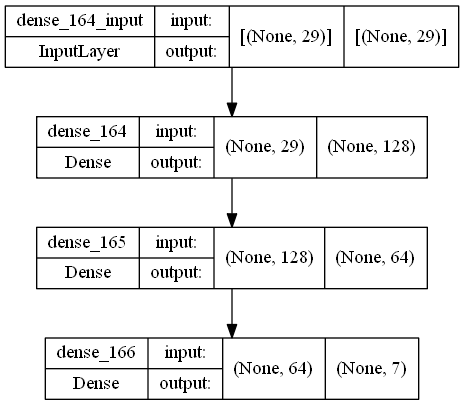

In [271]:
keras.utils.plot_model(model1, "info.png", show_shapes=True)

In [272]:
model2 = build_model()
history2 = model2.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=100).history

Epoch 1/100
57/57 [==============================] - 1s 5ms/step - loss: 0.7218 - accuracy: 0.7822 - val_loss: 0.2407 - val_accuracy: 0.9219
Epoch 2/100
57/57 [==============================] - 0s 3ms/step - loss: 0.1988 - accuracy: 0.9309 - val_loss: 0.1527 - val_accuracy: 0.9467
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9479 - val_loss: 0.1326 - val_accuracy: 0.9524
Epoch 4/100
57/57 [==============================] - 0s 3ms/step - loss: 0.1210 - accuracy: 0.9547 - val_loss: 0.1147 - val_accuracy: 0.9595
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 0.1103 - accuracy: 0.9584 - val_loss: 0.1121 - val_accuracy: 0.9595
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 0.1023 - accuracy: 0.9611 - val_loss: 0.1112 - val_accuracy: 0.9560
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0928 - accuracy: 0.9662 - val_loss: 0.1033 - val_accuracy: 0.9624
Epoch 8/100
5

Epoch 59/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9957 - val_loss: 0.0993 - val_accuracy: 0.9666
Epoch 60/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.0955 - val_accuracy: 0.9716
Epoch 61/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0149 - accuracy: 0.9959 - val_loss: 0.1021 - val_accuracy: 0.9680
Epoch 62/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9945 - val_loss: 0.1067 - val_accuracy: 0.9645
Epoch 63/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9968 - val_loss: 0.1108 - val_accuracy: 0.9673
Epoch 64/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.1045 - val_accuracy: 0.9673
Epoch 65/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9950 - val_loss: 0.1057 - val_accuracy: 0.9638
Epoch 

In [273]:
model1.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 128)               3840      
                                                                 
 dense_165 (Dense)           (None, 64)                8256      
                                                                 
 dense_166 (Dense)           (None, 7)                 455       
                                                                 
Total params: 12,551
Trainable params: 12,551
Non-trainable params: 0
_________________________________________________________________


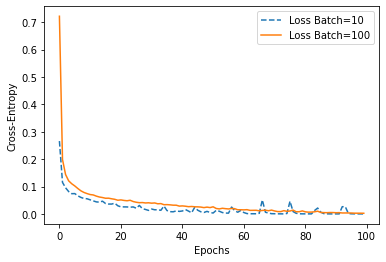

In [275]:
plt.plot(history1['loss'], label='Loss Batch=10', ls = "--")
plt.plot(history2['loss'], label='Loss Batch=100')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

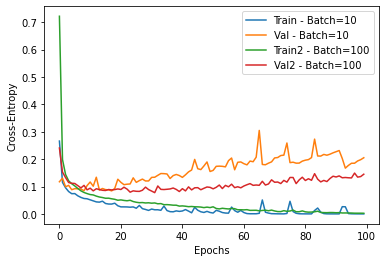

In [276]:
plt.plot(history1['loss'], label='Train - Batch=10')
plt.plot(history1['val_loss'], label='Val - Batch=10')
plt.plot(history2['loss'], label='Train2 - Batch=100')
plt.plot(history2['val_loss'], label='Val2 - Batch=100')

plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [277]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

93/93 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.9006
Loss 1.278369, Accuracy 0.892433
Loss 0.593067, Accuracy 0.900577


## Early Stopping

In [524]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = keras.models.Sequential()
    keras.layers.BatchNormalization()
    model.add(keras.layers.Dense(256, activation="relu",input_dim=n_feature,kernel_initializer="he_normal"))
    keras.layers.BatchNormalization()
    model.add(keras.layers.Dense(128, activation="relu",kernel_initializer="he_normal"))
    keras.layers.BatchNormalization()
    model.add(keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal"))
    keras.layers.BatchNormalization()
    model.add(keras.layers.Dense(7, activation="softmax"))
    loss_fn = keras.losses.SparseCategoricalCrossentropy()

    model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    return model

In [525]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [530]:
es = EarlyStopping(monitor='val_loss', patience=15)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model4 = build_model()
history4 = model4.fit(X_train, y_train, validation_split=0.15, epochs=500,
                      batch_size=50, callbacks=[es,mc], use_multiprocessing=True).history

Epoch 1/500
120/120 [==============================] - 1s 4ms/step - loss: 0.6163 - accuracy: 0.8266 - val_loss: 0.3903 - val_accuracy: 0.8759
Epoch 2/500
120/120 [==============================] - 0s 3ms/step - loss: 0.2385 - accuracy: 0.9231 - val_loss: 0.3556 - val_accuracy: 0.8826
Epoch 3/500
120/120 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 0.9368 - val_loss: 0.3302 - val_accuracy: 0.8835
Epoch 4/500
120/120 [==============================] - 0s 3ms/step - loss: 0.1596 - accuracy: 0.9432 - val_loss: 0.3227 - val_accuracy: 0.8854
Epoch 5/500
120/120 [==============================] - 0s 3ms/step - loss: 0.1427 - accuracy: 0.9452 - val_loss: 0.3207 - val_accuracy: 0.8864
Epoch 6/500
120/120 [==============================] - 0s 3ms/step - loss: 0.1308 - accuracy: 0.9503 - val_loss: 0.3124 - val_accuracy: 0.8873
Epoch 7/500
120/120 [==============================] - 0s 3ms/step - loss: 0.1208 - accuracy: 0.9545 - val_loss: 0.3305 - val_accuracy: 0.8864

In [531]:
test_loss_4, test_acc_4 = model4.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_4, test_acc_4))

93/93 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8941
Loss 1.278369, Accuracy 0.892433
Loss 0.593067, Accuracy 0.900577
Loss 0.360781, Accuracy 0.894130


In [521]:
model4.summary()

Model: "sequential_143"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_516 (Dense)           (None, 256)               7680      
                                                                 
 dense_517 (Dense)           (None, 128)               32896     
                                                                 
 dense_518 (Dense)           (None, 64)                8256      
                                                                 
 dense_519 (Dense)           (None, 7)                 455       
                                                                 
Total params: 49,287
Trainable params: 49,287
Non-trainable params: 0
_________________________________________________________________


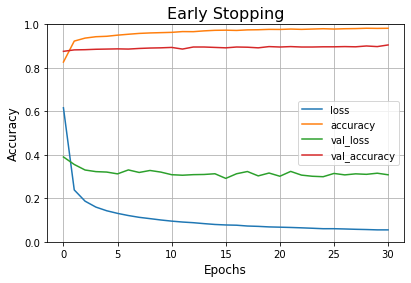

In [532]:
pd.DataFrame(history4).plot(figsize=(6.4, 4))
plt.grid(True)
plt.xlabel("Epochs",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.title("Early Stopping",fontsize=16)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## L2 Regularization 

In [535]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1

def build_L2_model():
    # define the model
    model = keras.models.Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(256, activation='selu', kernel_initializer="he_normal",kernel_regularizer=l2(0.1)))
    model.add(Dense(128, activation='selu',kernel_initializer="he_normal", kernel_regularizer=l2(0.1)))
    model.add(Dense(64, activation='selu',kernel_initializer="he_normal", kernel_regularizer=l2(0.1)))
    model.add(Dense(32, activation='selu',kernel_initializer="he_normal", kernel_regularizer=l2(0.1)))
    #linear activation
    model.add(Dense(7))

    #compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    
    return model

In [536]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_loss', save_best_only=True)

L2_model = build_L2_model()
h_L2 = L2_model.fit(X_train, y_train, validation_split=0.1, epochs=200,
                      batch_size=100, callbacks=[mc,es], use_multiprocessing=True).history

Epoch 1/200
64/64 [==============================] - 2s 11ms/step - loss: 86.3127 - accuracy: 0.3155 - val_loss: 75.0937 - val_accuracy: 0.3480
Epoch 2/200
64/64 [==============================] - 3s 54ms/step - loss: 66.5400 - accuracy: 0.3513 - val_loss: 58.3093 - val_accuracy: 0.3778
Epoch 3/200
64/64 [==============================] - 3s 53ms/step - loss: 51.6809 - accuracy: 0.4077 - val_loss: 45.2689 - val_accuracy: 0.4091
Epoch 4/200
64/64 [==============================] - 4s 68ms/step - loss: 40.0748 - accuracy: 0.4803 - val_loss: 35.2688 - val_accuracy: 0.5043
Epoch 5/200
64/64 [==============================] - 2s 28ms/step - loss: 31.0318 - accuracy: 0.6671 - val_loss: 27.1546 - val_accuracy: 0.8494
Epoch 6/200
64/64 [==============================] - 0s 5ms/step - loss: 24.1835 - accuracy: 0.6068 - val_loss: 21.1611 - val_accuracy: 0.5568
Epoch 7/200
64/64 [==============================] - 0s 5ms/step - loss: 18.7979 - accuracy: 0.5642 - val_loss: 16.5195 - val_accuracy: 0

In [509]:
from tensorflow.keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = keras.models.Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(keras.layers.Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    model.add(keras.layers.Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(Dropout(0.2))
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(Dropout(0.2))
    #linear activation
    model.add(keras.layers.Dense(7, activation="softmax"))
    


    #compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [401]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_accuracy', save_best_only=True)

DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train, y_train, validation_split=0.1,shuffle=True, epochs=200,
                      batch_size=100, callbacks=[es,mc], use_multiprocessing=True).history

Epoch 1/100
141/141 [==============================] - 1s 6ms/step - loss: 0.4446 - accuracy: 0.8401 - val_loss: 0.1431 - val_accuracy: 0.9476
Epoch 2/100
141/141 [==============================] - 1s 5ms/step - loss: 0.1712 - accuracy: 0.9396 - val_loss: 0.1012 - val_accuracy: 0.9529
Epoch 3/100
141/141 [==============================] - 1s 5ms/step - loss: 0.1498 - accuracy: 0.9438 - val_loss: 0.0996 - val_accuracy: 0.9583
Epoch 4/100
141/141 [==============================] - 1s 5ms/step - loss: 0.1233 - accuracy: 0.9551 - val_loss: 0.1267 - val_accuracy: 0.9520
Epoch 5/100
141/141 [==============================] - 1s 5ms/step - loss: 0.1106 - accuracy: 0.9576 - val_loss: 0.1068 - val_accuracy: 0.9583
Epoch 6/100
141/141 [==============================] - 1s 6ms/step - loss: 0.0939 - accuracy: 0.9656 - val_loss: 0.0809 - val_accuracy: 0.9654
Epoch 7/100
141/141 [==============================] - 1s 5ms/step - loss: 0.0935 - accuracy: 0.9622 - val_loss: 0.1107 - val_accuracy: 0.9565

In [537]:
from tensorflow.keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

93/93 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.9019


In [281]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

In [322]:
def build_model(n_layers=2, h_dim=64, activation='relu', optimizer='adam'):
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    
    model.add(Dense(h_dim, activation=activation, input_shape=(n_feature,)))
    for i in range(n_layers-1):
        model.add(Dense(h_dim, activation=activation))
    #linear activation
    model.add(Dense(7))

    #compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [480]:
n_layers = [1, 2, 3]
h_dim = [32, 64, 128]
activation = ["elu",'relu', 'linear','sigmoid','tanh']
optimizer = ['sgd', 'adam']
solver= ['sgd', 'adam',"lbfgs"]
learning_rate= ['constant','adaptive']
alpha = 10.0 ** -np.arange(1, 10)
hidden_layer_sizes = np.arange(10, 15)
random_state=[0,1,2,3,4,5,6,7,8,9]

params = dict(optimizer=optimizer, n_layers=n_layers, h_dim=h_dim, activation=activation)

In [481]:
model = KerasClassifier(build_fn=build_model)
rnd = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5, cv=3)
rnd_result = rnd.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1)

C:\Users\daddu\AppData\Local\Temp/ipykernel_16404/3661525903.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model)


ValueError: optimizer is not a legal parameter

In [574]:
print("Best: %f using %s" % (-rnd_result.best_score_, rnd_result.best_params_))
means = rnd_result.cv_results_['mean_test_score']
stds = rnd_result.cv_results_['std_test_score']
params = rnd_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (-mean, stdev, param))

Best: 1.277696 using {'optimizer': 'adam', 'n_layers': 2, 'h_dim': 32, 'activation': 'tanh'}
1.277696 (0.359074) with: {'optimizer': 'adam', 'n_layers': 2, 'h_dim': 32, 'activation': 'tanh'}
2.429639 (0.902098) with: {'optimizer': 'adam', 'n_layers': 2, 'h_dim': 32, 'activation': 'sigmoid'}
1.439848 (0.502840) with: {'optimizer': 'adagrad', 'n_layers': 3, 'h_dim': 64, 'activation': 'linear'}
1.698158 (0.216357) with: {'optimizer': 'adam', 'n_layers': 3, 'h_dim': 128, 'activation': 'elu'}
1.791759 (0.000000) with: {'optimizer': 'adam', 'n_layers': 2, 'h_dim': 128, 'activation': 'relu'}


In [575]:
clf = rnd_result.best_estimator_.model

loss, acc = clf.evaluate(X_test, y_test)
print('Loss %f, Accuracy %f' % (loss, acc))

76/76 [==============================] - 0s 1ms/step - loss: 1.4370 - accuracy: 0.7245
Loss 1.436990, Accuracy 0.724481
